### More no. of clusters will result in more convergence time. Be patient

In [26]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
np.random.seed(43)
% matplotlib inline

In [27]:
# distance function
def distance_func(x,y):
    return np.linalg.norm(x-y, ord = 2)

In [28]:
# K-means function
def kmeans(pixel,centroids,num_clusters):
    clusters = []
    c = pixel.shape[1]
    
    # calculating distance from centroids
    for i in range(pixel.shape[0]):
        temp = []
        for j in range(centroids.shape[0]):
            dist = distance_func(centroids[j],pixel[i])
            temp = np.append(temp,dist)
        clusters = np.append(clusters,np.argmin(temp))
    clusters = np.array(clusters)
    
    # Allocating points to clusters and finding new centroids
    new_centroids =np.zeros((num_clusters,c))
    out = np.zeros(pixel.shape,dtype=np.uint8)
    for i in range(num_clusters):
        z = np.argwhere(clusters==i)
        for j in z:
            new_centroids[i] = np.mean(pixel[j],axis = 0)   # finding new centroids
            out[j] = centroids[i]
    
    # calculating the error
    error = distance_func(new_centroids,centroids)
    centroids = new_centroids
    return error,centroids,out

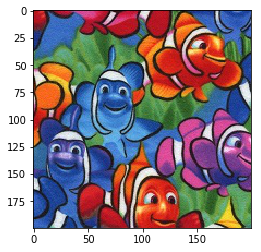

In [29]:
# displaying the input image
f = im.open('p.jpg')
plt.imshow(f)
plt.show()


Enter the no. of clusters : 10
Enter the stopping threshold value : 1
 At iteration 1, the error is 220.827155 
 At iteration 2, the error is 173.686245 
 At iteration 3, the error is 36.837481 
 At iteration 4, the error is 45.694639 
 At iteration 5, the error is 36.262929 
 At iteration 6, the error is 34.146742 
 At iteration 7, the error is 0.000000 

 centroids :  [[ 86.  85. 108.]
 [166. 161. 162.]
 [ 46.  31.  54.]
 [221.  84. 205.]
 [ 92.   0.  80.]
 [ 72. 118. 133.]
 [ 91. 190. 131.]
 [226.  45. 203.]
 [221. 224. 219.]
 [177.  28. 112.]]


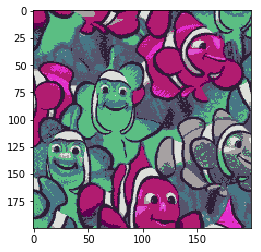

In [30]:
image = np.array(f)

# Taking input from user
num_clusters = int(input("Enter the no. of clusters : "))
threshold = float(input("Enter the stopping threshold value : "))

r = np.array([])
g = np.array([])
b = np.array([])
    
h,w,c = image.shape

# separating the channels
for i in range(h):
    for j in range(w):
        r = np.append(r,image[i][j][0])
        b = np.append(b,image[i][j][1])
        g = np.append(g,image[i][j][2])
    
r = np.reshape(r,(-1,1))
g = np.reshape(g,(-1,1))
b = np.reshape(b,(-1,1))
    
pixel = np.hstack((r,g))
pixel = np.hstack((pixel,b))

# Initializing the centroids array(centriods x channels)
centroids = np.random.rand(num_clusters,c)*255

# iterations on algorithm
count = 0
while True:
    error,up_cent,out = kmeans(pixel,centroids,num_clusters)
    
    # updating centroids
    centroids = up_cent
    count += 1
    # displaying errors and centroids
    print(" At iteration %1d, the error is %5f "%(count,error))
    
    
    # finally displaying centriods and clusters
    if error <= threshold:
        print("\n centroids : ",centroids)
        img  = np.reshape(out,image.shape)
        final = im.fromarray(img,'RGB')
        plt.imshow(final)
        plt.show()
        break

#### As value of K increases, there will be fewer elements in the cluster. The lesser number of elements means closer to the centroid. 